<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 13
#### *Tobias Bavasso Piizzi*

La resolución detallada se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal13/TareaSemanal13.pdf) 



## Consigna

Sintetice la siguiente transferencia cargada con componentes RC: 
<img src="./consigna_ej1.png" align="center" width="500" />
- Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
- Calcular el valor de los componentes, es decir la síntesis analítica.

### Síntesis Gráfica
<img src="./sintesis_ej1.png" align="center" width="500" />

Realizamos las remociones tales que nos permitan __*cumplir con los ceros*__ de transmisión en la transferencia.

### Simulación Circuital
<img src="./simu_ej1.png" align="center" width="500" />

A este circuito le aplicamos las __*condiciones de medición*__ para simular ganancia de corriente quedando el siguiente circuito en el cual __*se incluyó la carga*__.

<img src="./bode_ej1.png" align="center" width="500" />

### Simulación Circuital

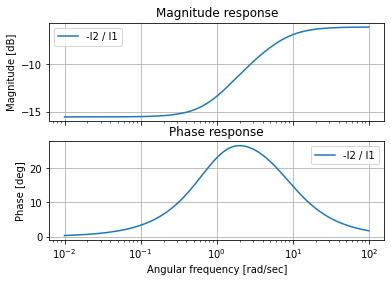

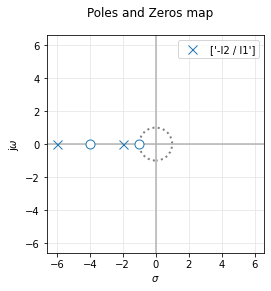

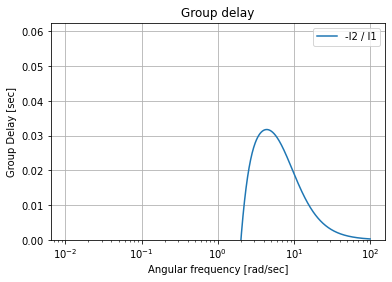

In [1]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pretty_print_lti , tfadd ,tfcascade
import numpy as np
import control.matlab as control
import matplotlib.pyplot as plt
#%matplotlib qt5
h = 1/2
#num1 = [1 , 5 , 4]
#den1 = [1,8,12]
num2 = [1*h , 5*h , 4*h]
den2 = [1,8,12]
#tf1 = sig.TransferFunction(num1,den1)
tf2 = sig.TransferFunction(num2,den2)
#analyze_sys( [tf1], ["Sin H" ])
analyze_sys( [tf2], ["-I2 / I1" ])

### Simulación Simbólica

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

s = sp.symbols('s', complex = True)

z22 = (s**2+8*s+12)/(s**2+5*s+4)

print("Remuevo --> R = 1/2")
z3 = sp.factor(sp.simplify(sp.expand(z22 - 1/2)))
print("Z3(s)= ", z3 )

sigma1 = 1
k1 = sp.limit((s+1)*z3 , s , -sigma1 )
print("Residuo",k1)                   #Residuo del tanque RC
c1 = 1/k1
r1 = k1/sigma1
print("Remuevo --> C1 = ",c1,"\t","R1 = ",r1)
z5 = sp.factor(sp.simplify(sp.expand(z3 - k1/(s+sigma1))))
print("Z5(s)=",z5)

sigma2 = 4
k2 = sp.limit((s+4)*z5 , s , -sigma2 )
print("Residuo",k2)                   #Residuo del tanque RC
c2 = 1/k2
r2 = k2/sigma2
print("Remuevo --> C2 = ",c2,"\t","R2 = ",r2)
z7 = sp.factor(sp.simplify(sp.expand(z5 - k2/(s+sigma2))))
print("Z7(s)=",z7)

print("Remuevo --> R =",z7)


Remuevo --> R = 1/2
Z3(s)=  10.0*(0.05*s**2 + 0.55*s + 1.0)/((s + 1)*(s + 4))
Residuo 1.66666666666667
Remuevo --> C1 =  0.600000000000000 	 R1 =  1.66666666666667
Z5(s)= 0.833333333333333*(0.15*s + 1.0)/(0.25*s + 1.0)
Residuo 1.33333333333333
Remuevo --> C2 =  0.750000000000000 	 R2 =  0.333333333333333
Z7(s)= 0.500000000000000
Remuevo --> R = 0.500000000000000


## Consigna

Dada la siguiente transferencia de impedancia:
<img src="./consigna2.png" align="center" width="500" />
- Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transimpedancia indicada, cargado a la salida con una impedancia como se muestra en la figura.
- Verificar la transimpedancia del circuito obtenido.

### Síntesis Gráfica Z
<img src="./sint1_ej2.png" align="center" width="500" />
<img src="./sint2_ej2.png" align="center" width="500" />

### Simulación Circuital Z
El circuito para implementar la función transferencia pedida es el siguiente

<img src="./circuito2.png" align="center" width="500" />

<img src="./bode_ej2.png" align="center" width="500" />


### Simulación Matemática
En los siguientes gráficos verificaremos que el cuadripolo propuesto responde a la función matemática que deseamos implementar

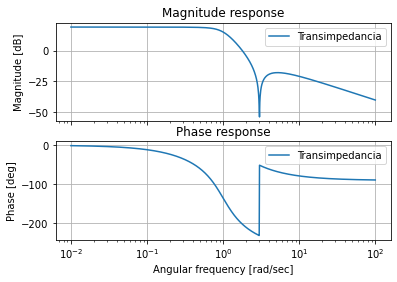

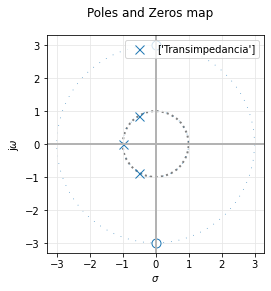

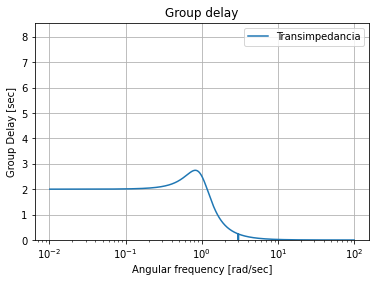

In [12]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pretty_print_lti , tfadd ,tfcascade
import numpy as np
import control.matlab as control
import matplotlib.pyplot as plt
#%matplotlib qt5

num1 = [1,0,9]
den1 = [1 , 2 , 2 , 1]

tf1 = sig.TransferFunction(num1,den1)

analyze_sys( [tf1], ["Transimpedancia" ])

### Simulación Simbólica

In [52]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

s = sp.symbols('s', complex = True)

z22 = (2*s**2+1)/(s**3+2*s)
y1 = 1/z22

kinf = sp.expand((s**2+2)/(2*s**2+1)).subs(s**2,-9)
print("koo =",kinf)
print("Remuevo --> C =",kinf)
y3 = sp.factor(sp.simplify(sp.expand(y1 - s*kinf)))
print("Y3(s)= ", y3 )

z3 = 1/y3

w2 = 9
k2 = sp.limit(z3*(s**2+w2)/s , s , 3j )
print("k2 =",k2)
print("Remuevo --> C =",1/k2,"\tL=",k2/w2)
z5 = sp.factor(sp.simplify(sp.expand(z3 - 289*s/(27*(s**2+9))))) # Si no fuerzo los valores aproxima cualquier cosa
print("Z5(s)= ", z5 )

y5 = 1/z5
print("Remuevo --> C =",y5/s)


koo = 7/17
Remuevo --> C = 7/17
Y3(s)=  3*s*(s**2 + 9)/(17*(2*s**2 + 1))
k2 = 10.7037037037037
Remuevo --> C = 0.0934256055363322 	L= 1.18930041152263
Z5(s)=  17/(27*s)
Remuevo --> C = 27/17
